In [4]:
###########################################################################     
############################ model training ###############################
###########################################################################


inp = input('Are you compiling on google colab?, y/n: ')
if inp.lower() == "y":
    print("We are using google colab")
    ############## if compile on google colab #################
    !pip install import-ipynb
    import import_ipynb

    !pip install -U -q PyDrive
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    your_module = drive.CreateFile({'id':'1UmFmSi9bU_uhArlFyVBz1SDiASMR67Gx'})
    # https://drive.google.com/open?id=1wCNx7SWrCPL78UmmzEF6pAfdniCVJUWS
    # https://drive.google.com/open?id=1WtBoScDx5eMdQKYwLAkUbpJyYUxrNFGw
    # https://drive.google.com/open?id=1UmFmSi9bU_uhArlFyVBz1SDiASMR67Gx
    your_module.GetContentFile('data_preprocessing.ipynb')
    import data_preprocessing as dp
    
    data = dp.process_data(1)
    
    
elif inp.lower() == "n":
    print("We are using local machine")
    ########## if compile locally ###############
    import data_preprocessing as dp
    
    data = dp.process_data(0)
else:
    print("Please reply y/n")
    
    


from fastai.vision import *
from fastai.metrics import error_rate
from sklearn.metrics import confusion_matrix

Are you compiling on google colab?, y/n: y
We are using google colab
Importing data from google drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Do you clear the folder ./original_data/?, y/n: y
The folder will be cleared
Do you clear the folder ./processed_data/?, y/n: y
The folder will be cleared

Created ./processed_data/test

Created ./processed_data/train

Created ./processed_data/valid
Do you clear the folder ./trained_models/?, y/n: y
The folder will be cleared

Created ./original_data/compost/

Created ./original_data/recycle/
./processed_data/test/
['./processed_data/train/trash/', './processed_data/train/recycle/', './processed_data/train/compost/']
['trash', 'recycle', 'compost']
trash  -- size of non-trainset:  255 , size of trainset:  383
recycle  -- size of non-trainset:  356 , size of trainset:  536
compost  -- size of non-trainset:  398 , size of trainset:  599
['./processed_data/valid

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


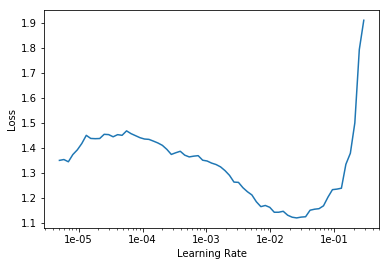

In [5]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

learn.model

learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()

In [6]:
learn.fit_one_cycle(20,max_lr=2.46e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.928989,0.563058,0.259406,00:42
1,0.639634,0.398932,0.166337,00:43
2,0.545654,0.376006,0.162376,00:42
3,0.490337,0.369480,0.150495,00:44
4,0.453131,0.318039,0.130693,00:42
5,0.413601,0.287157,0.116832,00:43
6,0.350515,0.281175,0.122772,00:42
7,0.338368,0.432732,0.166337,00:43
8,0.334873,0.256587,0.102970,00:41
9,0.302085,0.218091,0.093069,00:43


In [0]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [0]:
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

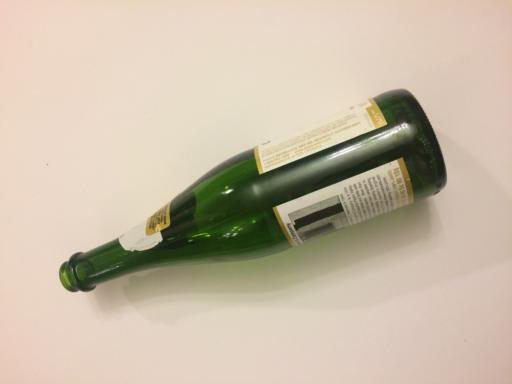

In [10]:
learn.data.test_ds[0][0]

In [0]:
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [12]:
## predicted values
print(yhat[300:305])
## actual values
print(y[300:305])

['recycle', 'recycle', 'recycle', 'recycle', 'recycle']
['recycle', 'recycle', 'recycle', 'recycle', 'recycle']


In [13]:

cm = confusion_matrix(y,yhat)
print(cm)

[[194   2   3]
 [  2 164  12]
 [  1  13 113]]


In [0]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [15]:
accuracy = correct/sum(sum(cm))
accuracy

0.9345238095238095

In [16]:
############## error analysis ###############
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.most_confused(min_val=2)

[('trash', 'recycle', 17),
 ('recycle', 'trash', 9),
 ('compost', 'trash', 5),
 ('recycle', 'compost', 2)]